In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = np.load('data.npy')

Pour notre premier clustering, nous utilisons la technique KMeans.

Nous pouvons établir notre nombre de cluster grâce à la métode du coude et l'analysis de silhouette. Nos 2 heuristiques nous indique que pour nos data, 6 clusters seraient optimal.

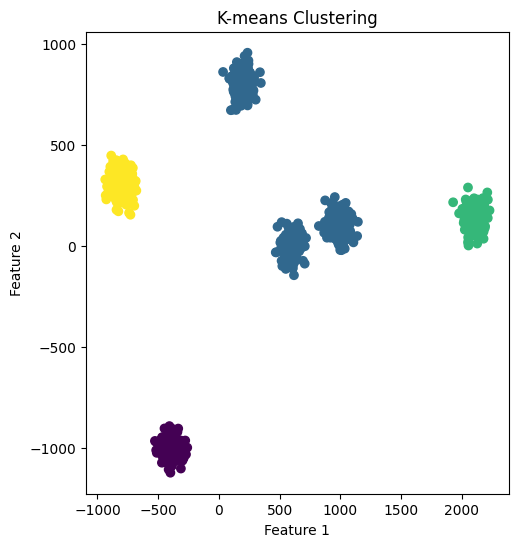

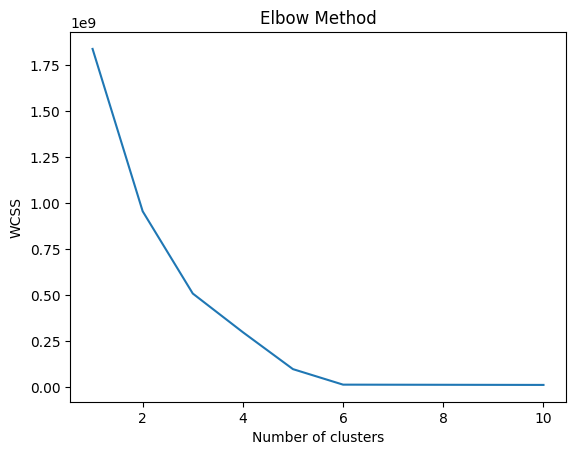

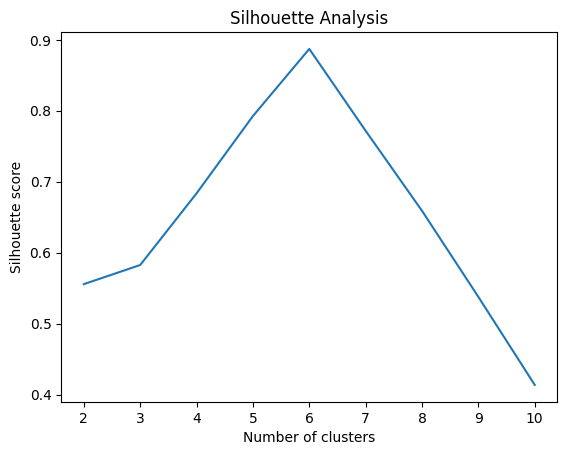

In [2]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels_kmeans = kmeans.labels_

# Display clusturing
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

# Elbow method to choose number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette analysis to choose number of clusters
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)
    sil_scores.append(silhouette_avg)
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Notre 2ème méthode de clustering est MeanShift.

On peut aussi observé que la méthode du coude nous indique 6 clusters.

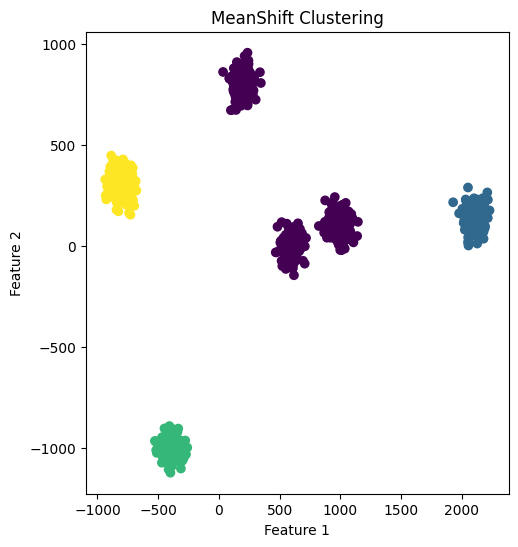

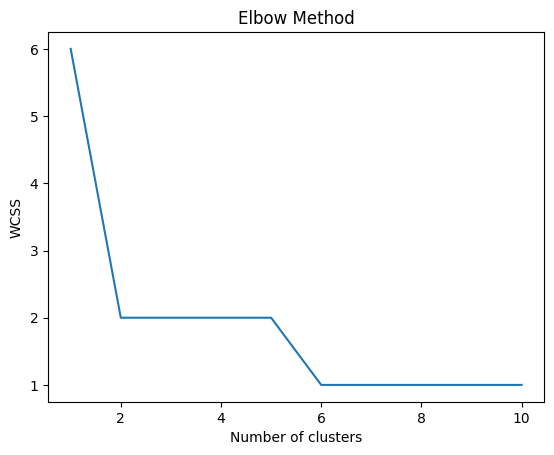

[0 0 0 ... 0 0 0]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [45]:
bandwidth = estimate_bandwidth(data, quantile=0.17, n_samples=len(data))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# Display clusturing
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('MeanShift Clustering')
plt.show()

wcss = []

for k in range(1, 11):
    bandwidth = estimate_bandwidth(data, quantile=float(k) * 0.1, n_samples=len(data))
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    wcss.append(n_clusters_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()